In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import regex as re

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [2]:
movies = pd.read_csv('data/cleaned_movie_stats.csv')

# Extracting Labels
ratings_labels = movies['vote_average'].values
popularity_labels =  movies['popularity'].values
movie_label = movies['movie'].values

# Data
movies = movies.drop(['genres', 'vid_ids', 'id', 'homepage','revenue', 
                      'release_date', 'decade', 'original_title', 'production_countries',
                     'production_companies', 'original_language', 'popularity', 'vote_average',
                     'spoken_languages', 'status', 'title', 'keywords'], axis=1)
movies.head()

,movie,views,likes,dislikes,comments,budget,overview,runtime,tagline,vote_count,genre,keyword,language,companies,countries,year,month,homepage_binary,budget_mln
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,"In the 22nd century, a paraplegic Marine is di...",162.0,Enter the World of Pandora.,11800,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...","['English', 'Español']","['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009.0,12.0,1,237.0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,"Captain Barbossa, long believed to be dead, ha...",169.0,"At the end of the world, the adventure begins.",4500,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",['English'],"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007.0,5.0,1,300.0
2,Spectre,5721876.0,14116.0,353.0,673.0,245000000,A cryptic message from Bond’s past sends him o...,148.0,A Plan No One Escapes,4466,"['Action', 'Adventure', 'Crime']","['spy', 'based on novel', 'secret agent', 'seq...","['Français', 'English', 'Español', 'Italiano',...","['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015.0,10.0,1,245.0
3,The Dark Knight Rises,38826999.0,118022.0,3683.0,49919.0,250000000,Following the death of District Attorney Harve...,165.0,The Legend Ends,9106,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...",['English'],"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012.0,7.0,1,250.0
4,John Carter,5065037.0,11752.0,748.0,652.0,260000000,"John Carter is a war-weary, former military ca...",132.0,"Lost in our world, found in another.",2124,"['Action', 'Adventure', 'Science Fiction']","['based on novel', 'mars', 'medallion', 'space...",['English'],['Walt Disney Pictures'],['United States of America'],2012.0,3.0,1,260.0


In [3]:
movies.columns

Index(['movie', 'views', 'likes', 'dislikes', 'comments', 'budget', 'overview',
       'runtime', 'tagline', 'vote_count', 'genre', 'keyword', 'language',
       'companies', 'countries', 'year', 'month', 'homepage_binary',
       'budget_mln'],
      dtype='object')

### Converting String of List of Strings to Array/List

In [4]:
# Example for Genre Seperations
import regex as re
genres = movies['genre']
genre_seperations = re.findall(r"[^']+", genres[0])
new_genres = [genre_seperations[index] for index in range(1, len(genre_seperations), 2)]
new_genres

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [5]:
import regex as re

genres = movies['genre']
new_genre_list = []

for genre_list in genres:
    genre_seperations = re.findall(r"[^']+", genre_list)
    new_genres = [genre_seperations[index] for index in range(1, len(genre_seperations), 2)]
    new_genre_list.append(new_genres)
    
new_genre_list = np.asarray(new_genre_list)
new_genre_list

/Users/admin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([list(['Action', 'Adventure', 'Fantasy', 'Science Fiction']),
       list(['Adventure', 'Fantasy', 'Action']),
       list(['Action', 'Adventure', 'Crime']), ...,
       list(['Comedy', 'Drama', 'Romance', 'TV Movie']), list([]),
       list(['Documentary'])], dtype=object)

## Data Preparation

In [6]:
#Defining a Function
# To convert String of List of Strings to Array
def convert_to_list_of_strings(df_column):
    
    new_list = []
    
    for topics in df_column:
        topic_seperations = re.findall(r"[^']+", topics)
        new_topics = [topic_seperations[index] for index in range(1, len(topic_seperations), 2)]
        new_list.append(new_topics)
        
    return np.asarray(new_list)

In [7]:
movies['genre'] = convert_to_list_of_strings(movies['genre'])
movies['keyword'] = convert_to_list_of_strings(movies['keyword'])
movies['companies'] = convert_to_list_of_strings(movies['companies'])
movies['countries'] = convert_to_list_of_strings(movies['countries'])
movies['language'] = convert_to_list_of_strings(movies['language'])

In [8]:
movies.head()

,movie,views,likes,dislikes,comments,budget,overview,runtime,tagline,vote_count,genre,keyword,language,companies,countries,year,month,homepage_binary,budget_mln
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,"In the 22nd century, a paraplegic Marine is di...",162.0,Enter the World of Pandora.,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[English, Español]","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009.0,12.0,1,237.0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,"Captain Barbossa, long believed to be dead, ha...",169.0,"At the end of the world, the adventure begins.",4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",[English],"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007.0,5.0,1,300.0
2,Spectre,5721876.0,14116.0,353.0,673.0,245000000,A cryptic message from Bond’s past sends him o...,148.0,A Plan No One Escapes,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Français, English, Español, Italiano, Deutsch]","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015.0,10.0,1,245.0
3,The Dark Knight Rises,38826999.0,118022.0,3683.0,49919.0,250000000,Following the death of District Attorney Harve...,165.0,The Legend Ends,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",[English],"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012.0,7.0,1,250.0
4,John Carter,5065037.0,11752.0,748.0,652.0,260000000,"John Carter is a war-weary, former military ca...",132.0,"Lost in our world, found in another.",2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[English],[Walt Disney Pictures],[United States of America],2012.0,3.0,1,260.0


In [9]:
genre_dummies = pd.get_dummies(movies['genre'].apply(pd.Series).stack()).sum(level=0)
movies = movies.assign(**genre_dummies).drop(['genre'], axis=1)
movies.head(2)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


,movie,views,likes,dislikes,comments,budget,overview,runtime,tagline,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,"In the 22nd century, a paraplegic Marine is di...",162.0,Enter the World of Pandora.,11800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,"Captain Barbossa, long believed to be dead, ha...",169.0,"At the end of the world, the adventure begins.",4500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Adding Top 10 Production Companies (Binarized)

In [10]:
movies['companies']

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4798                                  [Columbia Pictures]
4799                                                   []
4800    [Front Street Pictures, Muse Entertainment Ent...
4801                                                   []
4802         [rusty bear entertainment, lucky crow films]
Name: companies, Length: 4803, dtype: object

In [11]:
# Production Companies
# Creating a Seperate Column that Dictates Whether or Not
# The movie is from a Top 10 Major Production Company
# Top 10 Major Production Companies: https://blog.bizvibe.com/blog/top-movie-production-companies

popular_companies = ['Universal Pictures', 'Warner Bros.', 'Columbia Pictures', 'Walt Disney Pictures',
                    'Paramount Pictures', 'Twentieth Century Fox', 'RatPac-Dune Entertainment',
                    'Legendary Entertainment', 'Relativity Media']

pop_companies_binary = []
for production_companies in movies['companies']:
    
    if len(production_companies) == 0:
        pop_companies_binary.append(0)
        continue
    
    else:
        for company, index in zip(production_companies, range(0, len(production_companies))):
            if company in popular_companies:
                pop_companies_binary.append(1)
                break
            elif index == len(production_companies) - 1:
                pop_companies_binary.append(0)

len(pop_companies_binary), len(movies['companies'].values)

(4803, 4803)

In [12]:
movies['top_production_company'] = pop_companies_binary
movies.head(2)

,movie,views,likes,dislikes,comments,budget,overview,runtime,tagline,vote_count,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_production_company
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,"In the 22nd century, a paraplegic Marine is di...",162.0,Enter the World of Pandora.,11800,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,"Captain Barbossa, long believed to be dead, ha...",169.0,"At the end of the world, the adventure begins.",4500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
movies.columns

Index(['movie', 'views', 'likes', 'dislikes', 'comments', 'budget', 'overview',
       'runtime', 'tagline', 'vote_count', 'keyword', 'language', 'companies',
       'countries', 'year', 'month', 'homepage_binary', 'budget_mln', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'top_production_company'],
      dtype='object')

**Note:** Removing Overview and Tagline Temporarily for Clean Model

In [14]:
movies = movies.drop(['overview', 'tagline', 'companies'], axis=1)
movies.head(2)

,movie,views,likes,dislikes,comments,budget,runtime,vote_count,keyword,language,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_production_company
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,162.0,11800,"[culture clash, future, space war, space colon...","[English, Español]",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,169.0,4500,"[ocean, drug abuse, exotic island, east india ...",[English],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### One-Hot Encoding Language and Countries

In [15]:
language_dummies = pd.get_dummies(movies['language'].apply(pd.Series).stack()).sum(level=0).drop([', ', '??????'], axis=1)
countries_dummies = pd.get_dummies(movies['countries'].apply(pd.Series).stack()).sum(level=0)
movies = movies.assign(**language_dummies)
movies = movies.assign(**countries_dummies)
movies = movies.drop(['language', 'countries'], axis=1)
print(movies.shape)
movies.head(2)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


(4803, 182)


/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  


,movie,views,likes,dislikes,comments,budget,runtime,vote_count,keyword,year,...,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,162.0,11800,"[culture clash, future, space war, space colon...",2009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,169.0,4500,"[ocean, drug abuse, exotic island, east india ...",2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
countries_dummies.columns

Index(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Aruba', 'Australia',
       'Austria', 'Bahamas', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'Fiji',
       'Finland', 'France', 'Germany', 'Greece', 'Guadaloupe', 'Guyana',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Lebanon',
       'Libyan Arab Jamahiriya', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Malta', 'Mexico', 'Monaco', 'Morocco', 'Netherlands', 'New Zealand',
       'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia',
       'Serbia and Montenegro', 'Singapore', 'Slovakia', 'Slovenia',
    

In [17]:
language_dummies.columns

Index(['Afrikaans', 'Bahasa indonesia', 'Bamanankan', 'Bosanski', 'Català',
       'Cymraeg', 'Dansk', 'Deutsch', 'Eesti', 'English', 'Español',
       'Esperanto', 'Français', 'Gaeilge', 'Galego', 'Hrvatski', 'Italiano',
       'Kiswahili', 'Latin', 'Magyar', 'Nederlands', 'No Language', 'Norsk',
       'Polski', 'Português', 'Pусский', 'Română', 'Slovenčina', 'Slovenščina',
       'Somali', 'Srpski', 'Tiếng Việt', 'Türkçe', 'Wolof', ']', 'isiZulu',
       'shqip', 'suomi', 'svenska', 'Íslenska', 'Český', 'ελληνικά',
       'Український', 'български език', 'қазақ', 'עִבְרִית', 'اردو', 'العربية',
       'فارسی', 'پښتو', 'हिन्दी', 'বাংলা', 'ਪੰਜਾਬੀ', 'தமிழ்', 'ภาษาไทย',
       'ქართული', '广州话 / 廣州話', '日本語', '普通话', '한국어/조선말'],
      dtype='object')

In [18]:
movies.columns

Index(['movie', 'views', 'likes', 'dislikes', 'comments', 'budget', 'runtime',
       'vote_count', 'keyword', 'year',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States of America'],
      dtype='object', length=182)

### Lastly, Temporarily Removing Keywords

Too many columns to one-hot encode for keywords so simply removing it from model.

In [19]:
keyword_dummies = pd.get_dummies(movies['keyword'].apply(pd.Series).stack()).sum(level=0)
keyword_dummies.columns

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


Index([' boarding school", ', ' life", ', ' man", ', ' movement", ',
       ' quarter", ', ' school", ', ' war", ', ', ', ', "boys', ', "children',
       ...
       'zombie', 'zombie apocalypse', 'zombification', 'zoo', 'zookeeper',
       'zurich', 'Γη', '卧底肥妈', '绝地奶霸', '超级妈妈'],
      dtype='object', length=9648)

In [20]:
movies = movies.drop(['keyword'], axis=1)

In [21]:
print(movies.shape)
movies.columns

(4803, 181)


Index(['movie', 'views', 'likes', 'dislikes', 'comments', 'budget', 'runtime',
       'vote_count', 'year', 'month',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States of America'],
      dtype='object', length=181)

In [22]:
movies = movies.drop(['movie'], axis=1)
movies.columns

Index(['views', 'likes', 'dislikes', 'comments', 'budget', 'runtime',
       'vote_count', 'year', 'month', 'homepage_binary',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States of America'],
      dtype='object', length=180)

## Final Dataframe for Modeling

In [23]:
# Need 25 - 30% of Data for Testing

train_ratio = 0.75
validation_ratio = 0.15
#test_ratio = 0.10

# Training Data
train_data = movies[:round(movies.shape[0] * train_ratio)]
train_rating_labels =  ratings_labels[:round(movies.shape[0] * train_ratio)]
train_popularity_labels = popularity_labels[:round(movies.shape[0] * train_ratio)]
train_movie_labels = movie_label[:round(movies.shape[0] * train_ratio)]

# Validation Data
end_index = round(movies.shape[0] * train_ratio) + round(movies.shape[0] * validation_ratio)
val_data = movies[round(movies.shape[0] * train_ratio):end_index]
val_rating_labels =  ratings_labels[round(movies.shape[0] * train_ratio):end_index]
val_popularity_labels = popularity_labels[round(movies.shape[0] * train_ratio):end_index]
val_movie_labels = movie_label[round(movies.shape[0] * train_ratio):end_index]

# Testing Data
test_data = movies[end_index:]
test_rating_labels =  ratings_labels[end_index:]
test_popularity_labels = popularity_labels[end_index:]
test_movie_labels = movie_label[end_index:]

print('Training Data:', train_data.shape)
print('Training Data Rating Labels:', train_rating_labels.shape)
print('Training Data Popularity Labels:', train_popularity_labels.shape)
print('Training Data Movie Labels:', train_movie_labels.shape)
print()

print('Validation Data:', val_data.shape)
print('Validation Data Rating Labels:', val_rating_labels.shape)
print('Validation Data Popularity Labels:', val_popularity_labels.shape)
print('Validation Data Movie Labels:', val_movie_labels.shape)
print()

print('Testing Data:', test_data.shape)
print('Testing Data Rating Labels:', test_rating_labels.shape)
print('Testing Data Popularity Labels:', test_popularity_labels.shape)
print('Testing Data Movie Labels:', test_movie_labels.shape)

Training Data: (3602, 180)
Training Data Rating Labels: (3602,)
Training Data Popularity Labels: (3602,)
Training Data Movie Labels: (3602,)

Validation Data: (720, 180)
Validation Data Rating Labels: (720,)
Validation Data Popularity Labels: (720,)
Validation Data Movie Labels: (720,)

Testing Data: (481, 180)
Testing Data Rating Labels: (481,)
Testing Data Popularity Labels: (481,)
Testing Data Movie Labels: (481,)


## PCA

Percentage of variance explained by each of the first k components:
k = 1: 0.96
k = 2: 1.0
k = 3: 1.0
k = 4: 1.0
k = 5: 1.0
k = 10: 1.0
k = 20: 1.0
k = 30: 1.0
k = 40: 1.0
k = 50: 1.0


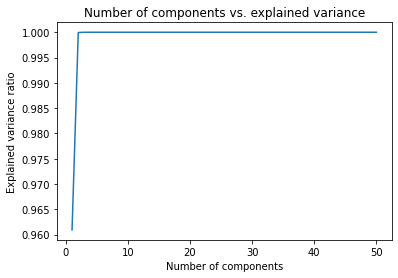

In [32]:
def P1():
    
    k = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    pca = PCA(n_components=k[-1])
    pca.fit(test_data.fillna(0))
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    print("Percentage of variance explained by each of the first k components:")
    for i, k in enumerate(k):
        print(f'k = {k}: {round(explained_variance[k-1], 2)}')
        
    plt.plot(np.arange(1,51), explained_variance)
    plt.ylabel('Explained variance ratio') 
    plt.xlabel('Number of components')
    plt.title('Number of components vs. explained variance')  
    plt.show() 

P1()